In [1]:
import numpy as np                                                
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
sns.set()

from subprocess import check_output

In [2]:
ipl = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")
ipl.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [4]:
profile1 = pandas_profiling.ProfileReport(ipl)
profile1.to_file(outputfile="ipl_before_preprocessing.html")
profile1

Number of variables,18
Number of observations,696
Total Missing (%),5.2%
Total size in memory,98.0 KiB
Average record size in memory,144.1 B
Numeric,4
Categorical,13
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [5]:
print(ipl.dtypes)  

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object


In [6]:
ipl.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [7]:
ipl.count()  

id                 696
season             696
city               689
date               696
team1              696
team2              696
toss_winner        696
toss_decision      696
result             696
dl_applied         696
winner             693
win_by_runs        696
win_by_wickets     696
player_of_match    693
venue              696
umpire1            695
umpire2            695
umpire3             60
dtype: int64

In [8]:
ipl.drop(['venue','umpire1','umpire2','umpire3','id'], axis=1, inplace=True)
ipl

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav
5,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan
6,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana
7,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel
8,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson
9,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah


In [9]:
ipl.replace({('winner') : {'Rising Pune Supergiant' : 'Rising Pune Supergiants'}}, inplace=True)
ipl

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav
5,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan
6,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana
7,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel
8,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson
9,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah


In [10]:
ipl.sort_values('season')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
116,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan
82,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir
81,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock
80,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan
79,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar
78,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag
77,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar
76,2008,Hyderabad,2008-05-01,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh
75,2008,Delhi,2008-04-30,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Daredevils,10,0,GD McGrath
74,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya


In [11]:
ipl.reset_index()
ipl

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav
5,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan
6,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana
7,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel
8,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson
9,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah


In [12]:
ipl.index = np.arange(1,len(ipl)+1)
ipl

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav
6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan
7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana
8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel
9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson
10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah


In [13]:
ipl.count() 

season             696
city               689
date               696
team1              696
team2              696
toss_winner        696
toss_decision      696
result             696
dl_applied         696
winner             693
win_by_runs        696
win_by_wickets     696
player_of_match    693
dtype: int64

In [14]:
profile2 = pandas_profiling.ProfileReport(ipl)
profile2.to_file(outputfile="ipl_after_preprocessing.html")
profile2

Number of variables,14
Number of observations,696
Total Missing (%),0.1%
Total size in memory,76.2 KiB
Average record size in memory,112.1 B
Numeric,4
Categorical,9
Boolean,1
Date,0
Text (Unique),0
Rejected,0


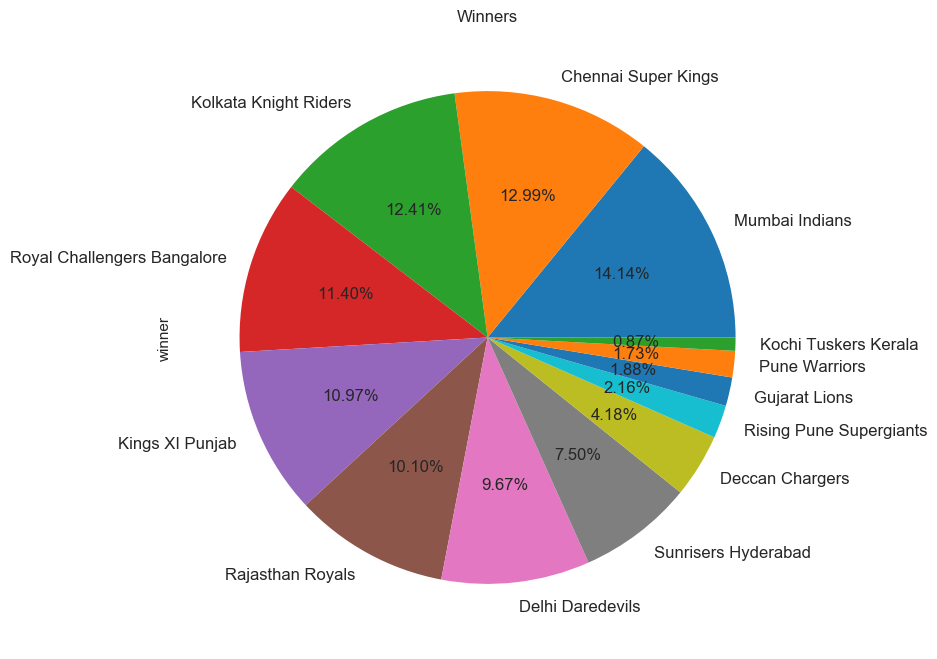

In [15]:
ipl['winner'].value_counts().plot.pie(title= 'Winners', figsize=(8,8), autopct='%.2f%%',fontsize=12);

In [16]:
ipl['winner'].value_counts()

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

In [17]:
ipl['toss_decision'].value_counts()

field    413
bat      283
Name: toss_decision, dtype: int64

Text(0.5,1,'Toss decision by the teams')

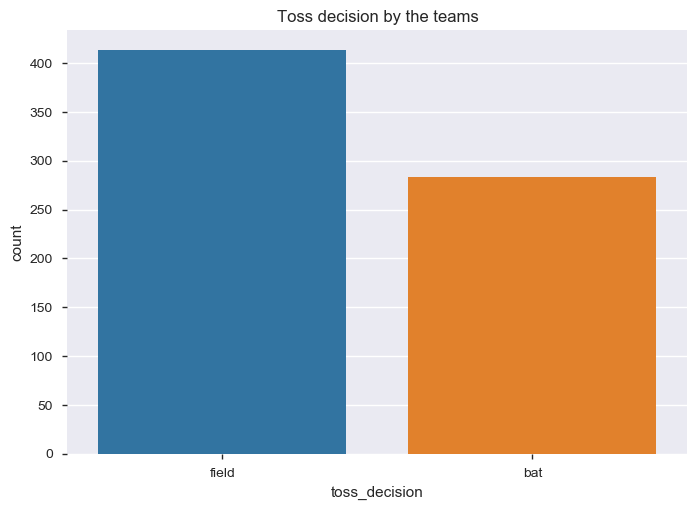

In [18]:
sns.countplot(x='toss_decision', data=ipl).set_title('Toss decision by the teams')

In [19]:
ipl['ggwp'] = (ipl['toss_winner'] == ipl['winner']).astype('int')
# print(sum(ipl['ggwp']))
ipl['ggwp'].value_counts()

1    352
0    344
Name: ggwp, dtype: int64

In [20]:
ipl['toss_decision'][ipl['win_by_runs'] > 0].value_counts()

field    184
bat      131
Name: toss_decision, dtype: int64

In [21]:
ipl['toss_decision'][ipl['win_by_wickets'] > 0].value_counts()

field    223
bat      148
Name: toss_decision, dtype: int64

In [22]:
manofmatch = ipl['player_of_match'].value_counts()
manofmatch.head(10)

CH Gayle          20
AB de Villiers    18
RG Sharma         16
YK Pathan         16
DA Warner         15
SK Raina          14
MS Dhoni          14
SR Watson         13
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

Text(0.5,1,'Man of the match')

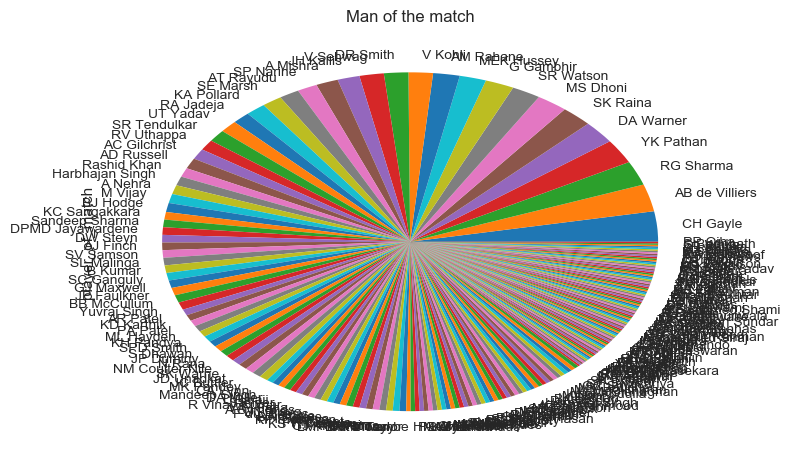

In [23]:
manofmatch.plot.pie().set_title('Man of the match')

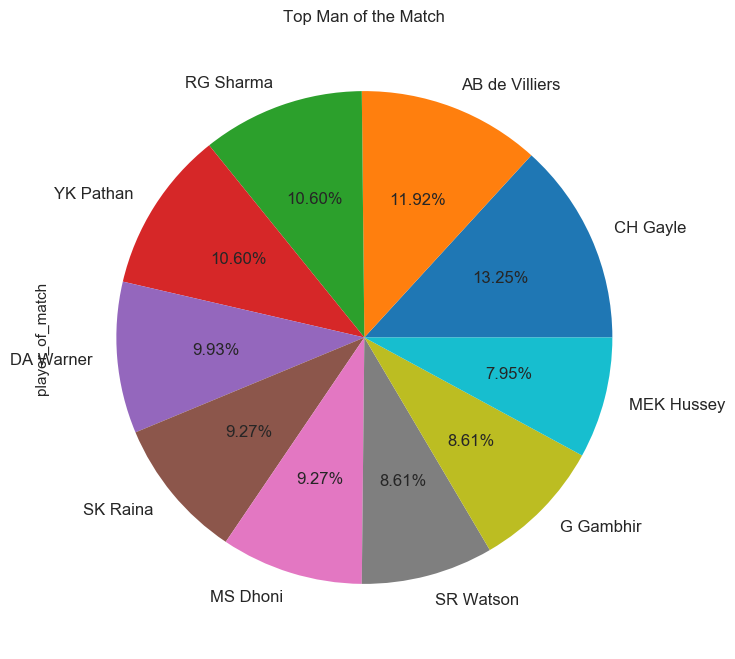

In [24]:
manofmatch.head(10).plot.pie(title= 'Top Man of the Match', figsize=(8,8), autopct='%.2f%%',fontsize=12);

In [25]:
ipl['dl_applied'][ipl['win_by_runs'] > 0][ipl['toss_decision'] == 'bat'].value_counts()

0    127
1      4
Name: dl_applied, dtype: int64

In [26]:
ipl['dl_applied'][ipl['win_by_runs'] > 0][ipl['toss_decision'] == 'field'].value_counts()

0    177
1      7
Name: dl_applied, dtype: int64

In [27]:
ipl['dl_applied'][ipl['win_by_wickets'] > 0][ipl['toss_decision'] == 'bat'].value_counts()

0    146
1      2
Name: dl_applied, dtype: int64

In [28]:
ipl['dl_applied'][ipl['win_by_wickets'] > 0][ipl['toss_decision'] == 'field'].value_counts()

0    217
1      6
Name: dl_applied, dtype: int64

In [29]:
ipl['season'].value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
Name: season, dtype: int64

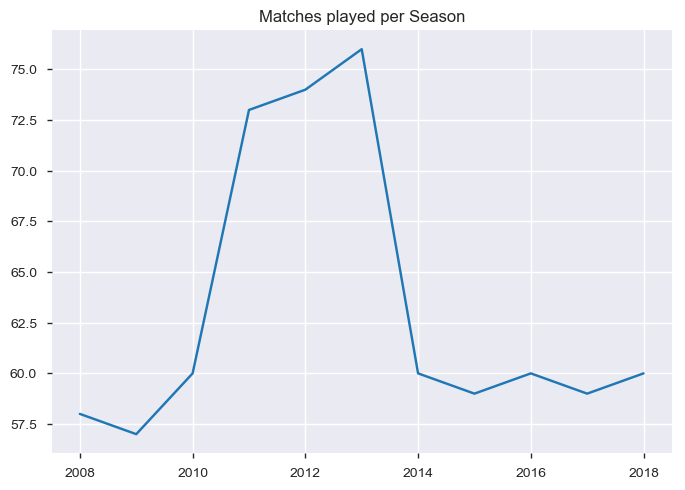

In [30]:
ipl['season'].value_counts().sort_index().plot.line(title= 'Matches played per Season')

In [31]:
ipl['result'].value_counts()

normal       686
tie            7
no result      3
Name: result, dtype: int64

In [32]:
ipl['season'][ipl['result'] == 'tie'].value_counts().sort_index()

2009    1
2010    1
2013    2
2014    1
2015    1
2017    1
Name: season, dtype: int64

In [33]:
ipl['season'][ipl['result'] == 'no result'].value_counts().sort_index()

2011    1
2015    2
Name: season, dtype: int64

In [34]:
ipl['season'][ipl['dl_applied'] == 1].value_counts().sort_index()

2008    2
2009    3
2011    3
2014    1
2015    2
2016    4
2017    1
2018    3
Name: season, dtype: int64

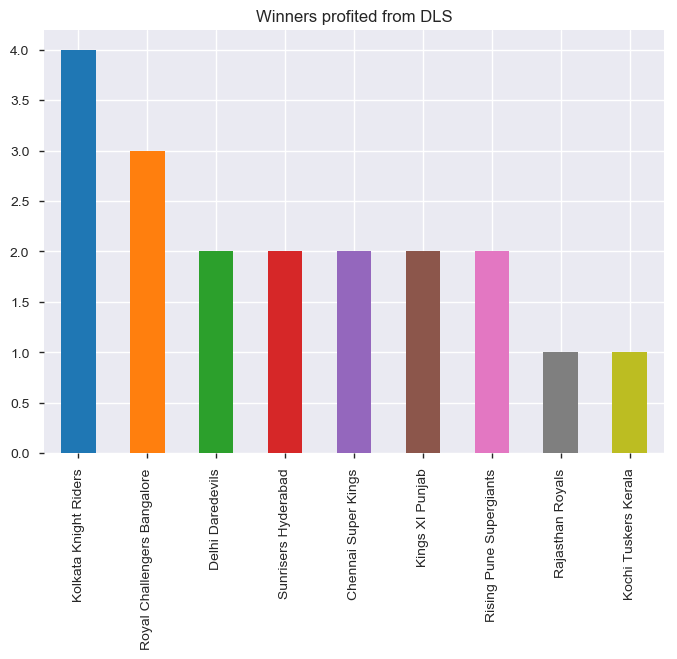

In [35]:
ipl['winner'][ipl['dl_applied'] == 1].value_counts().plot.bar(title= 'Winners profited from DLS')

In [36]:
ipl['winner'][ipl['dl_applied'] == 1].value_counts()

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Delhi Daredevils               2
Sunrisers Hyderabad            2
Chennai Super Kings            2
Kings XI Punjab                2
Rising Pune Supergiants        2
Rajasthan Royals               1
Kochi Tuskers Kerala           1
Name: winner, dtype: int64

In [37]:
ipl['toss_winner'][ipl['dl_applied'] == 1].value_counts()

Kolkata Knight Riders          4
Delhi Daredevils               3
Rising Pune Supergiants        3
Sunrisers Hyderabad            2
Chennai Super Kings            2
Kings XI Punjab                2
Royal Challengers Bangalore    1
Rajasthan Royals               1
Kochi Tuskers Kerala           1
Name: toss_winner, dtype: int64

In [38]:
ipl['city'].value_counts()

Mumbai            94
Kolkata           70
Delhi             67
Bangalore         66
Hyderabad         56
Chennai           49
Chandigarh        46
Jaipur            40
Pune              38
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Indore             9
Dharamsala         9
Johannesburg       8
Cuttack            7
Port Elizabeth     7
Ranchi             7
Abu Dhabi          7
Bengaluru          7
Cape Town          7
Sharjah            6
Raipur             6
Kochi              5
Kanpur             4
Kimberley          3
Mohali             3
Nagpur             3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [39]:
ipl['city'][ipl['winner'] == 'Mumbai Indians'].value_counts()

Mumbai            48
Kolkata           10
Bangalore          8
Hyderabad          5
Pune               4
Chandigarh         4
Delhi              3
Chennai            3
Indore             2
Visakhapatnam      2
Jaipur             2
Port Elizabeth     2
Ahmedabad          1
Cape Town          1
East London        1
Centurion          1
Rajkot             1
Name: city, dtype: int64

In [40]:
ipl['city'][ipl['winner'] == 'Chennai Super Kings'].value_counts()

Chennai           34
Mumbai            11
Pune               6
Delhi              5
Kolkata            4
Bangalore          4
Ranchi             3
Chandigarh         3
Hyderabad          3
Jaipur             2
Port Elizabeth     2
Centurion          2
Durban             1
Visakhapatnam      1
Dharamsala         1
Bengaluru          1
Johannesburg       1
Sharjah            1
Kimberley          1
East London        1
Abu Dhabi          1
Name: city, dtype: int64